In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
d = 'credit_rating.csv'
df_data = pd.read_csv(d)

In [5]:
# identify the dimension of the data set
df_data.shape

(2029, 31)

In [6]:
df_data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [7]:
# identifying the structure of the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
Rating                                2029 non-null object
Name                                  2029 non-null object
Symbol                                2029 non-null object
Rating Agency Name                    2029 non-null object
Date                                  2029 non-null object
Sector                                2029 non-null object
currentRatio                          2029 non-null float64
quickRatio                            2029 non-null float64
cashRatio                             2029 non-null float64
daysOfSalesOutstanding                2029 non-null float64
netProfitMargin                       2029 non-null float64
pretaxProfitMargin                    2029 non-null float64
grossProfitMargin                     2029 non-null float64
operatingProfitMargin                 2029 non-null float64
returnOnAssets                        2029 non-null float64

In [8]:
# identifying how the rating is distributed
df_data.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

In [9]:
# mapping the Rating into Risk types based on Moody's and Standard & Poor's standards
rating_classification = {'AAA' : 'Lowest Risk', 'AA' : 'Low Risk', 'A' : 'Low Risk', 'BBB' : 'Medium Risk', 'BB' : 'High Risk', 'B' : 'High Risk', 'CCC' : 'Highest Risk', 'CC' : 'Highest Risk', 'C' : 'Highest Risk', 'D' : 'In Default'}
df_data.Rating = df_data.Rating.map(rating_classification)

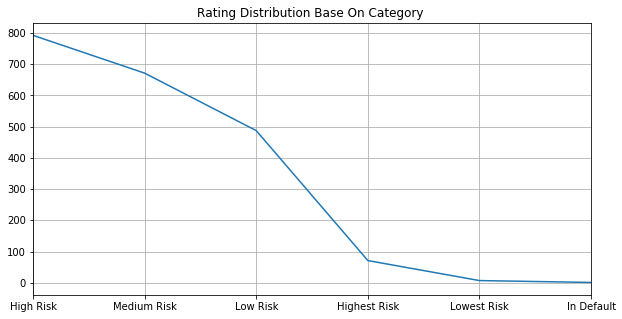

In [10]:
rating_count_graph = df_data['Rating'].value_counts().plot(kind='line', figsize=(10,5), title='Rating Distribution Base On Category ', grid=True)

In [11]:
# filtering out insuffient data categories - Lowest Risk, In Default
df_data = df_data[df_data['Rating']!='Lowest Risk']
df_data = df_data[df_data['Rating']!='In Default']

#Reset the data index
df_data.reset_index(inplace = True, drop=True)

In [12]:
# data statistics to identify data distribution
df_data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611016,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [13]:
# identifying asymmetry in data distribution
df_data.skew(axis = 0)

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

In [14]:
# list of attributes
attribute = list(df_data.columns)
print(attribute)

# obtain a few samples of the attributes
columns = sample(attribute[6:31],10)
print(columns)

['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover']
['freeCashFlowOperatingCashFlowRatio', 'payablesTurnover', 'pretaxProfitMargin', 'quickRatio', 'cashPerShare', 'operatingCashFlowPerShare', 'grossProfitMargin', 'operatingProfitMargin', 'effectiveTaxRate', 'netProfitMargin']


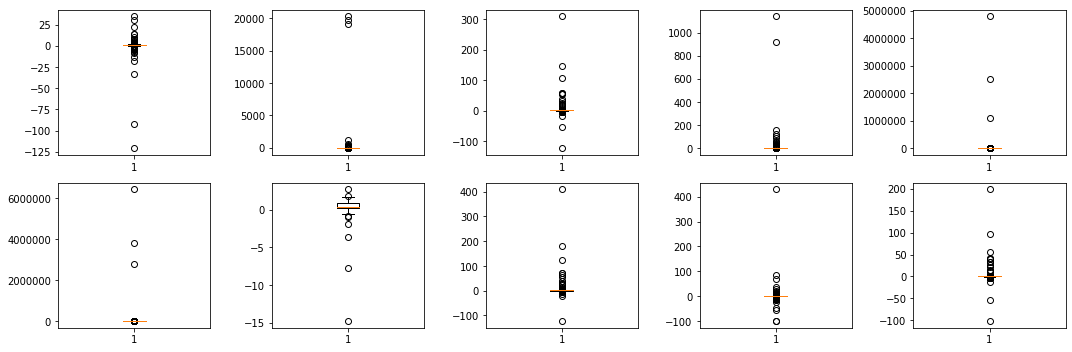

In [15]:
# plotting a boxplot to visualize outlier distribution

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

ax[0, 0].boxplot(df_data[columns[0]])
ax[0, 1].boxplot(df_data[columns[1]])
ax[0, 2].boxplot(df_data[columns[2]])
ax[0, 3].boxplot(df_data[columns[3]])
ax[0, 4].boxplot(df_data[columns[4]])
ax[1, 0].boxplot(df_data[columns[5]])
ax[1, 1].boxplot(df_data[columns[6]])
ax[1, 2].boxplot(df_data[columns[7]])
ax[1, 3].boxplot(df_data[columns[8]])
ax[1, 4].boxplot(df_data[columns[9]])

fig.tight_layout()

In [16]:
# identifying the outlier percentage per attribute

df_data_outlier = df_data.copy()

for x in attribute[6:31]:

    Q1 = df_data[x].quantile(0.25)
    Q3 = df_data[x].quantile(0.75)
    # Interquartile range formula
    IQR = Q3 - Q1
    interquartile_high = Q1 + 1.5 * IQR
    interquartile_low  = Q3 - 1.5 * IQR
    high_out = len(df_data.loc[(df_data[x] > interquartile_high)  ,x])
    low_out = len(df_data.loc[(df_data[x] < interquartile_low)  ,x])
    outlier_value = low_out+high_out
    push_out = (outlier_value/len(df_data))*100
    print(x, ": "+ format(push_out))
    
    for i in range(len(df_data_outlier)):
        if df_data.loc[i,x] < interquartile_low or df_data.loc[i,x] > interquartile_high:
            df_data_outlier.loc[i,x] = 1
        else:
            df_data_outlier.loc[i,x] = 0         

currentRatio : 18.010885700148442
quickRatio : 19.04997525977239
cashRatio : 14.844136566056406
daysOfSalesOutstanding : 23.5526966848095
netProfitMargin : 25.086590796635328
pretaxProfitMargin : 24.492825333993075
grossProfitMargin : 0.9896091044037605
operatingProfitMargin : 22.117763483424046
returnOnAssets : 24.245423057892133
returnOnCapitalEmployed : 22.068283028203858
returnOnEquity : 28.698664027709054
assetTurnover : 15.833745670460168
fixedAssetTurnover : 13.458683819891142
debtEquityRatio : 22.068283028203858
debtRatio : 21.32607619990104
effectiveTaxRate : 28.05541810984661
freeCashFlowOperatingCashFlowRatio : 16.922315685304305
freeCashFlowPerShare : 23.5526966848095
cashPerShare : 17.120237506185056
companyEquityMultiplier : 22.018802572983674
ebitPerRevenue : 24.344383968332508
enterpriseValueMultiple : 23.701138050470064
operatingCashFlowPerShare : 17.664522513607125
operatingCashFlowSalesRatio : 16.872835230084114
payablesTurnover : 14.448292924294904


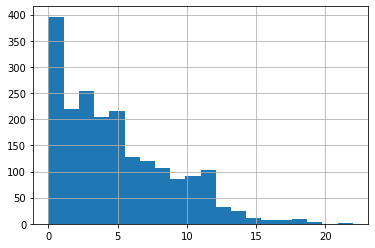

In [17]:
df_data_outlier["value"] = df_data_outlier.sum(axis = 1)
df_data_outlier.value.hist(bins = 20)

In [18]:
# normalisation of the data
minmax_scaler = preprocessing.MinMaxScaler()

for i in attribute[6:31]:
    df_data[[i]] = minmax_scaler.fit_transform(df_data[[i]].to_numpy())*1000
    df_data[[i]] = df_data[i].apply(lambda x: np.log10(x + 0.01))

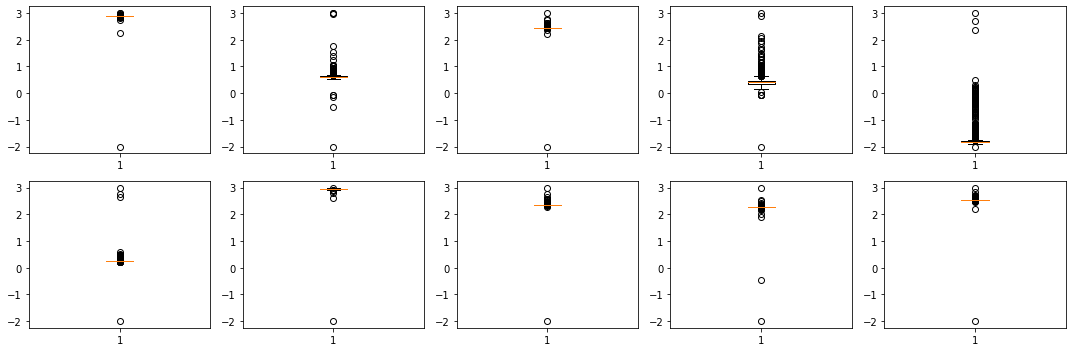

In [19]:
# plotting a boxplot to visualize outlier distribution

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

ax[0, 0].boxplot(df_data[columns[0]])
ax[0, 1].boxplot(df_data[columns[1]])
ax[0, 2].boxplot(df_data[columns[2]])
ax[0, 3].boxplot(df_data[columns[3]])
ax[0, 4].boxplot(df_data[columns[4]])
ax[1, 0].boxplot(df_data[columns[5]])
ax[1, 1].boxplot(df_data[columns[6]])
ax[1, 2].boxplot(df_data[columns[7]])
ax[1, 3].boxplot(df_data[columns[8]])
ax[1, 4].boxplot(df_data[columns[9]])

fig.tight_layout()

['fixedAssetTurnover', 'cashRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'debtRatio', 'companyEquityMultiplier', 'operatingProfitMargin', 'grossProfitMargin', 'operatingCashFlowSalesRatio', 'operatingCashFlowPerShare', 'returnOnCapitalEmployed', 'cashPerShare']


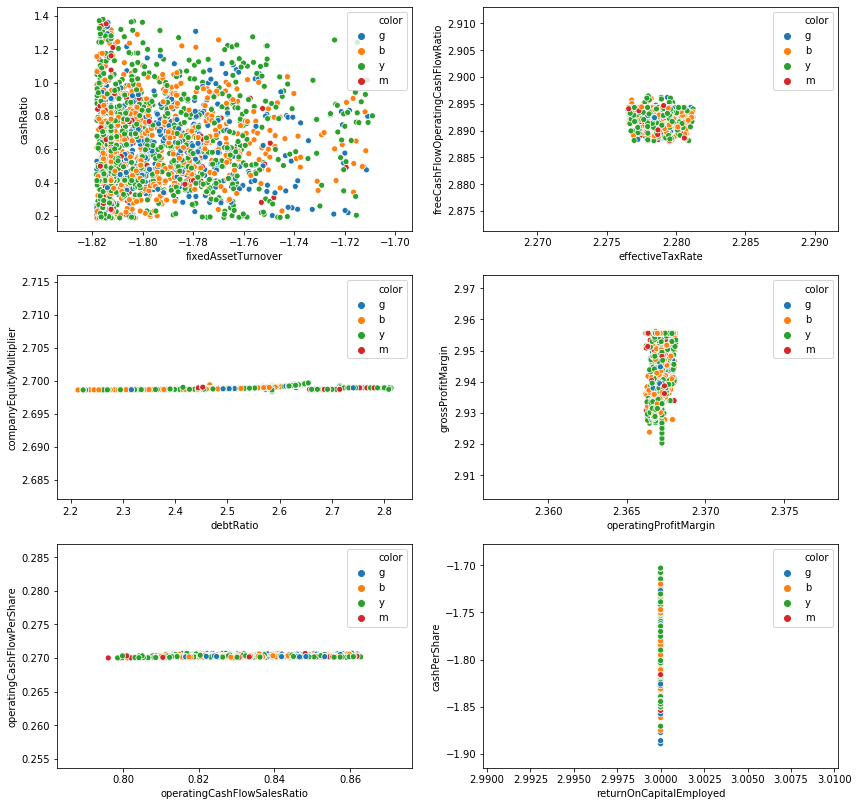

In [42]:
# data visualization using scatter plot

df_data.colors = 'a'

df_data_new.loc[df_data_new['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_data_new.loc[df_data_new['Rating'] == 'Low Risk', 'color'] = 'g'
df_data_new.loc[df_data_new['Rating'] == 'Medium Risk', 'color'] = 'b'
df_data_new.loc[df_data_new['Rating'] == 'High Risk','color'] = 'y'
df_data_new.loc[df_data_new['Rating'] == 'Highest Risk', 'color'] = 'm'

columns = list(df_data.columns[6:31])
columns = sample(column_list,12)
print(columns)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
a = 0 
b = 0

for k in range(0,12, 2):
    sns.scatterplot(x = columns[k], y=columns[k+1], hue="color", data=df_data_new, ax=axes[b,a])    
    if  a == 1:
        a = 0
        b +=1    
    else:
        a+=1

In [46]:
#Prepare the data set

encode = preprocessing.LabelEncoder()
encode.fit(df_data.Sector)
df_data.Sector = encode.transform(df_data.Sector)
encode.fit(df_data.Rating)
df_data.Rating = encode.transform(df_data.Rating)
df_data_train, df_data_test = train_test_split(df_data, test_size=0.2, random_state = 1234)
X_data_train, y_data_train = df_data_train.iloc[:,5:31], df_data_train.iloc[:,0]
X_data_test, y_data_test = df_data_test.iloc[:,5:31], df_data_test.iloc[:,0]


In [87]:
#XGB Boost

XGB_classifier = xgb.XGBClassifier(objective = 'reg:linear', num_class = 4, max_depth = 12)
XGB_classifier.fit(X_data_train, y_data_train)
XGB_y_pred = XGB_classifier.predict(X_data_test)
XGB_acc = metrics.accuracy_score(y_data_test, XGB_y_pred)
print("The Accuracy of XGB Classifier is:",XGB_acc*100)

The Accuracy of XGB Classifier is: 66.17283950617285


In [57]:
# Random Forest

RF_classifier = RandomForestClassifier(random_state=1234)
RF_classifier.fit(X_data_train,y_data_train)
RF_y_pred = RF_classifier.predict(X_data_test)
RF_acc = metrics.accuracy_score(y_data_test, RF_y_pred)
print("The Accuracy of Random Forest Classifier is:",RF_acc*100)

The Accuracy of Random Forest Classifier is: 62.46913580246913


In [65]:
# logistic Regression

LR_regressor = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_regressor = LR_regressor.fit(X_data_train, y_data_train)
LR_y_pred = LR_regressor.predict(X_data_test)
LR_acc = metrics.accuracy_score(y_data_test, LR_y_pred)
print("The Accuracy of Logistic Regression Classifier is:",LR_acc*100)

The Accuracy of Random Forest Classifier is: 39.25925925925926


In [76]:
# K Nearest Neighbours

KNN_classifier = KNeighborsClassifier(n_neighbors = 3)
KNN_classifier.fit(X_data_train, y_data_train)
KNN_y_pred = KNN_classifier.predict(X_data_test)
KNN_acc = metrics.accuracy_score(y_data_test, KNN_y_pred)
print("The Accuracy of K Nearest Neighbours Classifier is:",KNN_acc*100)

The Accuracy of K Nearest Neighbours Classifier is: 58.0246913580247


In [75]:
# Extremely Random Trees

ETC_classifier = ExtraTreesClassifier(random_state=1234)
ETC_classifier.fit(X_data_train,y_data_train)
ETC_y_pred = ETC_classifier.predict(X_data_test)
ETC_acc = metrics.accuracy_score(y_data_test, ETC_y_pred)
print("The Accuracy of Extremely Random Trees Classifier is:",ETC_acc*100)

The Accuracy of Extremely Random Trees Classifier is: 65.4320987654321


In [77]:
# training model comparison

acc_list = [XGB_acc, RF_acc, LR_acc, KNN_acc, ETC_acc]
model_name = ['XGB_Boost', 'Random_Forest', 'Logistic_Regression', 'K_Nearest_Neighbour', 'Extremely_Random_Trees']
df_acc = pd.DataFrame({'Model': model_name, 'Accuracy': acc_list})

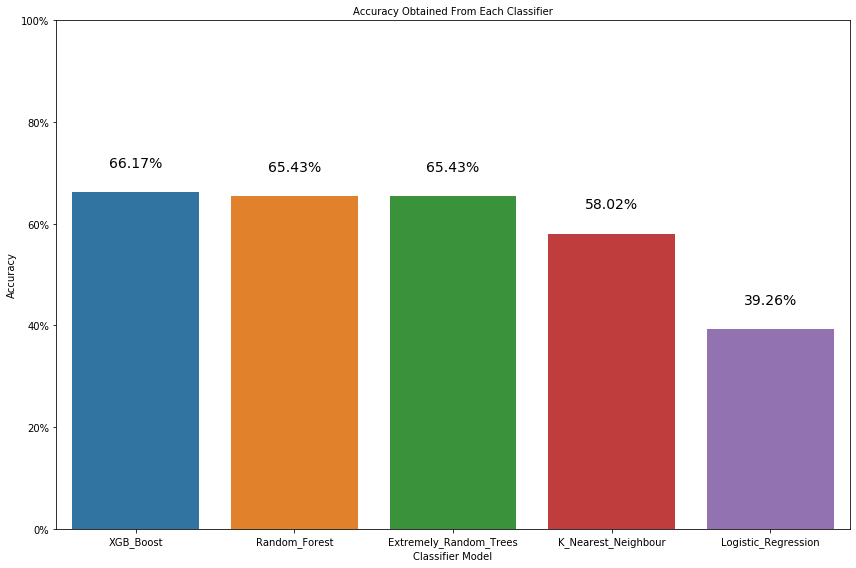

In [99]:
order = list(df_acc.sort_values('Accuracy', ascending=False).Model)
df_acc = df_acc.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))

# visualizing and comparing the accuracy as bar plots for various models
x = sns.barplot(x='Model', y="Accuracy", data=df_acc, order = order)
plt.xlabel("Classifier Model", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy Obtained From Each Classifier", fontsize=10)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_name)):
    plt.text(x = i, y = df_acc.loc[i, 'Accuracy'] + 0.05, s = str(round((df_acc.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')
    
plt.tight_layout()

In [102]:
cofusion = confusion_matrix(y_data_test, XGB_y_pred)

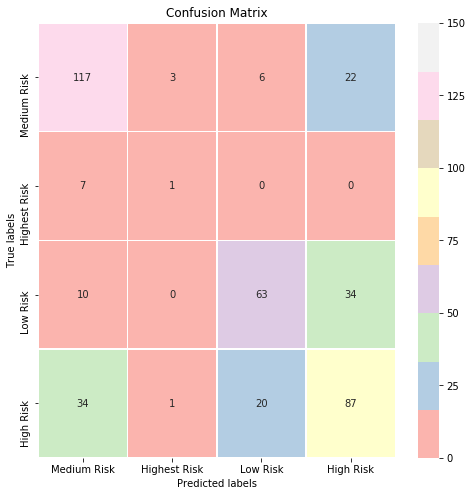

In [108]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cofusion, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Pastel1") 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk'])
ax.yaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']);

# This part is to correct a bug from the heatmap funciton from pyplot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5 # Add 0.5 to the bottom
top -= 0.5 # Subtract 0.5 from the top
plt.ylim(bottom, top) # update the ylim(bottom, top) values

plt.show()

In [109]:
print(classification_report(y_data_test, XGB_y_pred, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.70      0.79      0.74       148
Highest Risk       0.20      0.12      0.15         8
    Low Risk       0.71      0.59      0.64       107
   High Risk       0.61      0.61      0.61       142

    accuracy                           0.66       405
   macro avg       0.55      0.53      0.54       405
weighted avg       0.66      0.66      0.66       405

